In [2]:
# Importing the necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from keras.layers import Embedding
import plotly.express as px


In [3]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [4]:
df= pd.read_excel('/content/drive/MyDrive/player info.xlsx',index_col=0)
df.head()

,VIP level,LoginTime,Top-Up,MatchWin,MatchLoss
ID,,,,,
68,7,36,74424,191979,141956
337,3,64,81693,133874,162730
868,0,22,18879,155557,135817
246,9,95,15938,194244,144165
3,0,99,49464,107236,130203


Data Preprocessing

Dealing with Missing Values

In [5]:
# Do we have missing values?
df.isnull().sum().sort_values(ascending=False).head()

VIP level    0
LoginTime    0
Top-Up       0
MatchWin     0
MatchLoss    0
dtype: int64

Imputing missing values with mean

code was - df.loc[(df['XXX'].isnull() == True), 'XXX'] = df['XXX'].mean()   

In [6]:
df = df.reset_index(drop=True)

In [7]:
df.describe()

,VIP level,LoginTime,Top-Up,MatchWin,MatchLoss
count,886.000000,886.000000,886.000000,886.000000,886.000000
mean,4.940181,52.356659,54394.925508,149877.793454,148777.316027
std,3.165461,27.792803,26203.522251,28459.600998,28593.662282
min,0.000000,5.000000,10129.000000,100118.000000,100039.000000
25%,2.000000,28.000000,31027.250000,125048.750000,123630.000000
50%,5.000000,52.000000,54369.500000,150174.000000,149603.500000
75%,8.000000,76.750000,77340.750000,173683.500000,172490.750000
max,10.000000,100.000000,99995.000000,199971.000000,199989.000000


Standardization

In [8]:
df_final = df.copy()

# Standardization
for i in df_final.select_dtypes(exclude='object').columns:
    df_final.loc[:, i] = StandardScaler().fit_transform(np.array(df_final[[i]]))

Modeling clusters

Clustering using K-Prototypes

In [9]:
#Choosing optimal K
K = range(1,15)
cost = []
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(df_final, categorical=[1,2])
    cost.append(kproto.cost_)

<ipython-input-10-bdc573589481>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, cost, 'bo-', color = '#FFC300')


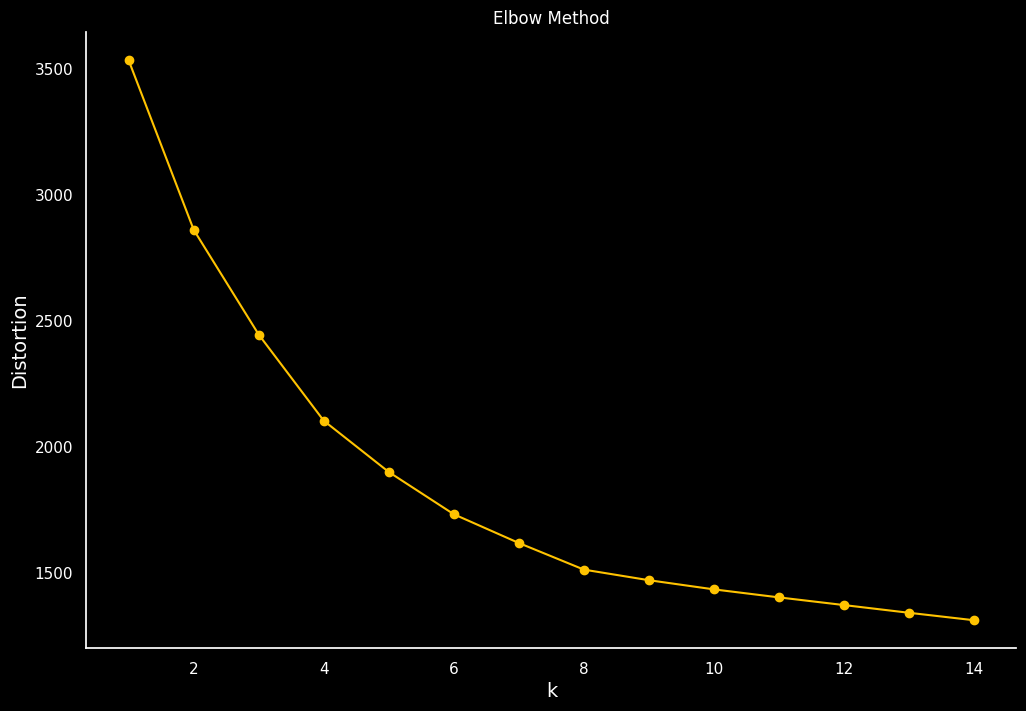

In [10]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

fig, ax = plt.subplots(figsize =(12, 8))

plt.plot(K, cost, 'bo-', color = '#FFC300')
plt.xlabel('k', color = 'white', size = 14)
plt.ylabel('Distortion', color = 'white', size = 14)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Elbow Method', color = 'white')


plt.show()

In [11]:
# Clustering
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(df_final, categorical=[1,2])

In [12]:
# Merging original data with clusters
df_clusters = pd.concat([df, pd.DataFrame({'cluster': clusters})], axis=True)


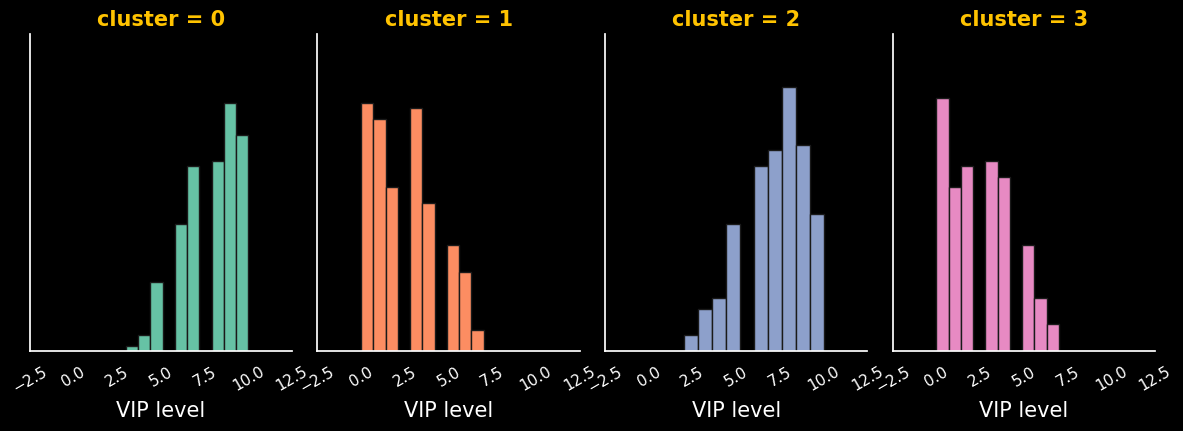

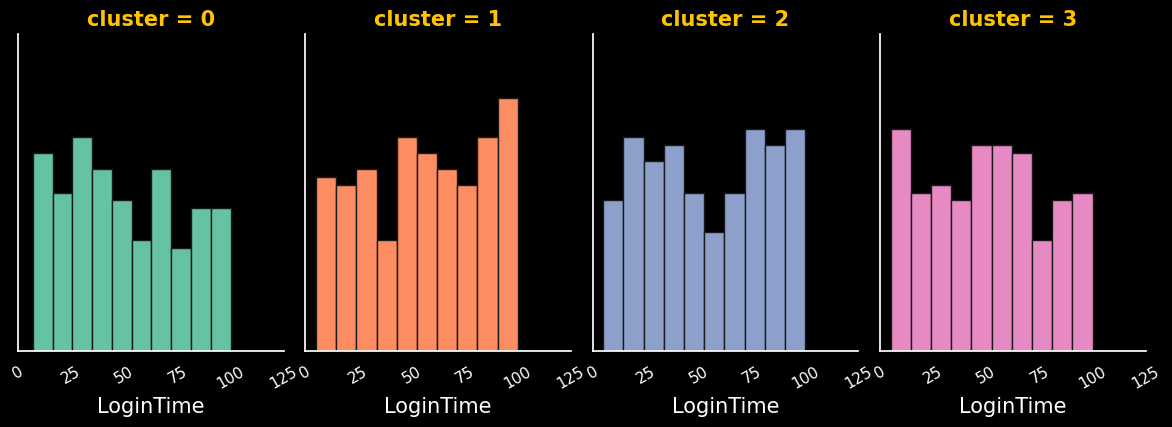

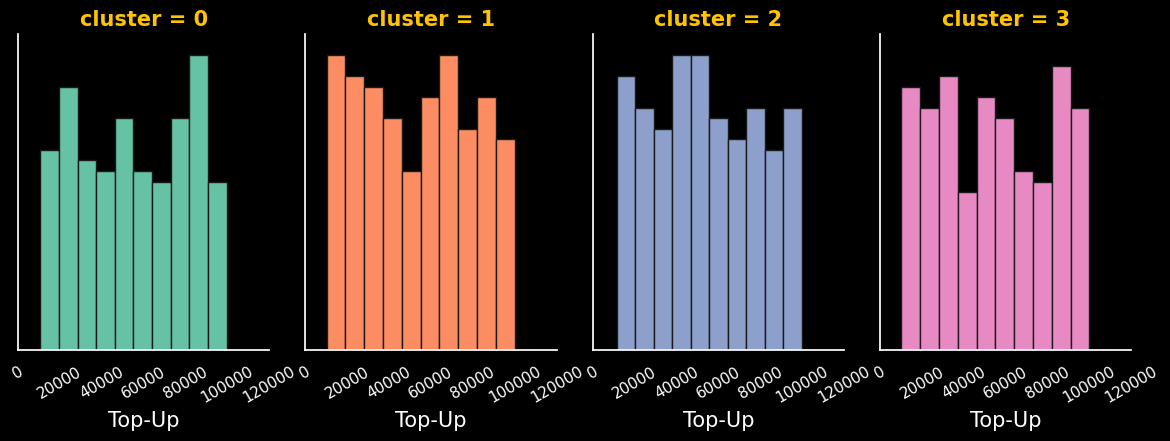

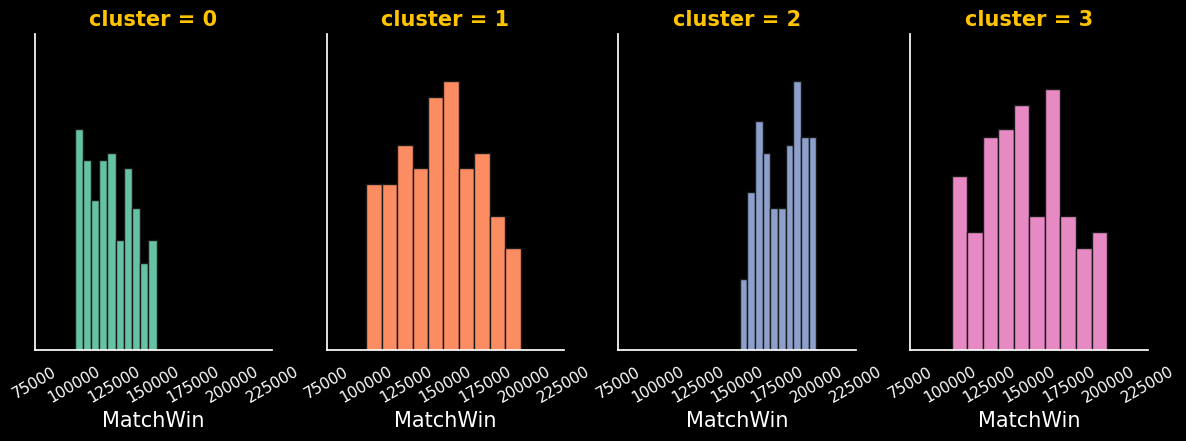

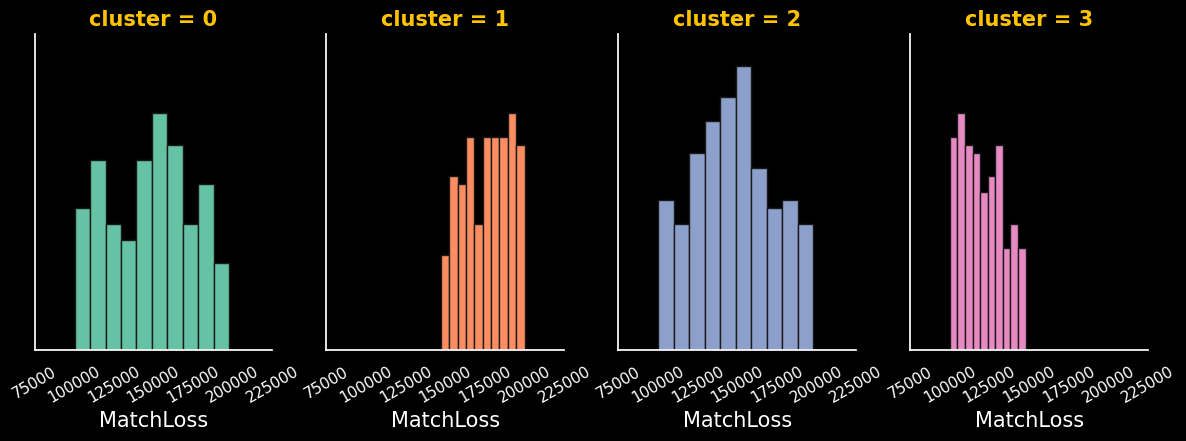

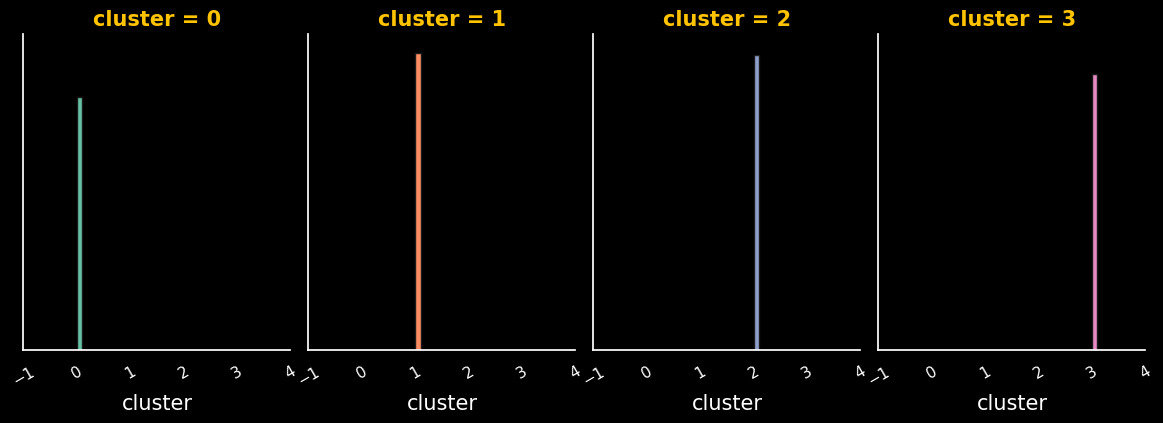

In [13]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_clusters:
    g = sns.FacetGrid(df_clusters, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k")
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

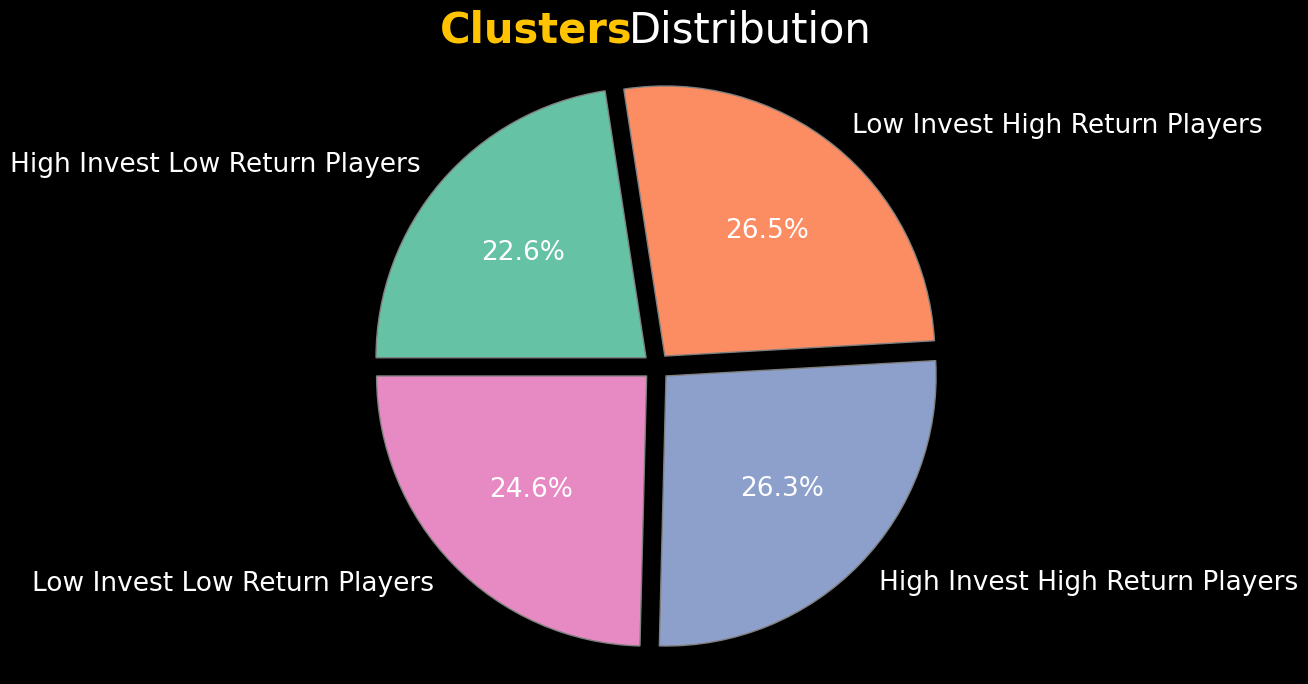

In [14]:
# Results
clusters_count = df_clusters['cluster'].value_counts()                        # Counting wins-losses-draws
clusters_count = clusters_count.to_frame().reset_index()                      # Convert series to dataframe
clusters_count.columns = ['clusters', 'count']                                # Rename column names
clusters_count = clusters_count.sort_values('clusters', ascending = True)     # Sorting data

labels = [
         "High Invest Low Return Players",
        "Low Invest High Return Players",
        "High Invest High Return Players",
        "Low Invest Low Return Players"
        ]

# Visualization
plt.figure(figsize=(12,8))

mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:4]

plt.pie(clusters_count['count'],
        explode=(0.05, 0.05, 0.05, 0.05),
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth': 1}
        )

plt.axis('equal')

# Title
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-0.10, 1.2, "Distribution", size=30, color="white")

# Author
#plt.text(1.1, -1.25, "@by a nonsense & Lonely guy did all shit alone and done", fontsize=24, ha="right", color='lightgray', fontweight="bold")

plt.show()

<ipython-input-15-6aa8eae01180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters_topup['group'] = clusters_topup['cluster']                     # Create new variable
<ipython-input-15-6aa8eae01180>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters_topup['group'] = clusters_topup['group'].astype(str)           # Change data type
<ipython-input-15-6aa8eae01180>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

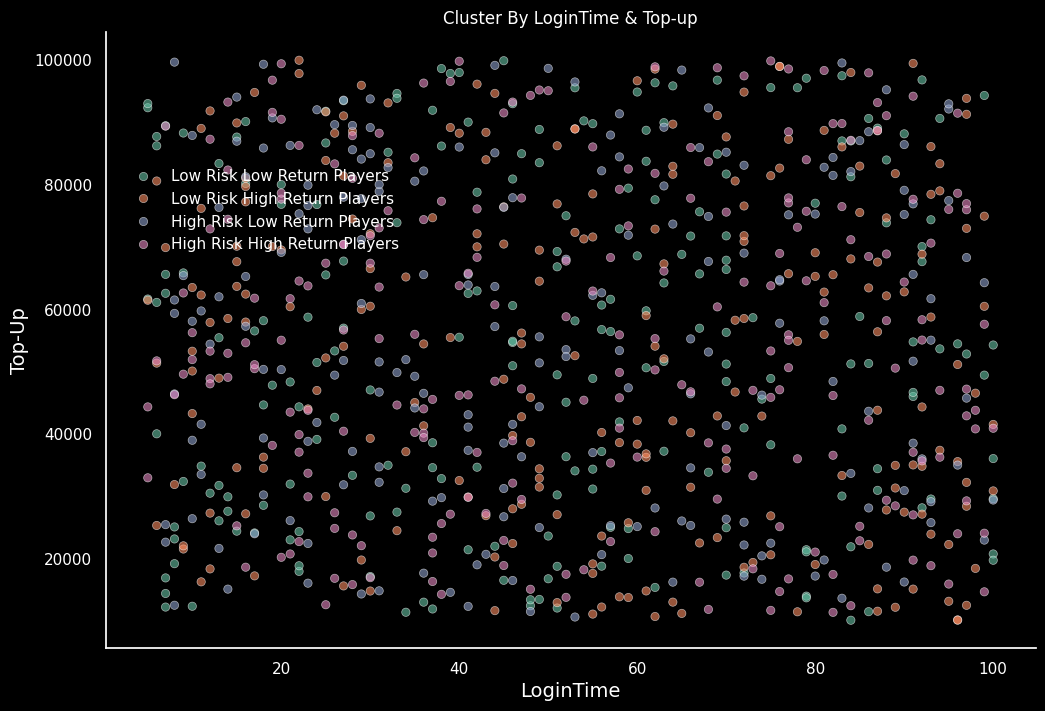

In [15]:
# Creating a new dataset
clusters_topup = df_clusters[['LoginTime', 'Top-Up', 'cluster']]           # Select variables
clusters_topup['group'] = clusters_topup['cluster']                     # Create new variable
clusters_topup['group'] = clusters_topup['group'].astype(str)           # Change data type

# Rename values
clusters_topup['group'] = clusters_topup['group'].str.replace('0', 'High Risk Low Return Players')
clusters_topup['group'] = clusters_topup['group'].str.replace('1', 'Low Risk High Return Players')
clusters_topup['group'] = clusters_topup['group'].str.replace('2', 'High Risk High Return Players')
clusters_topup['group'] = clusters_topup['group'].str.replace('3', 'Low Risk Low Return Players')

clusters_topup = clusters_topup.sort_values('group', ascending = False)    # Sorting data

# Visualizing
fig, ax = plt.subplots(figsize =(12, 8))

sns.scatterplot(data = clusters_topup, x = 'LoginTime', y = 'Top-Up', hue = 'group', palette = 'Set2', alpha=0.6)

# Naming axis labels
plt.xlabel('LoginTime', color = 'white', size = 14);
plt.ylabel('Top-Up', color = 'white', size = 14);

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Coloring the axis in white
plt.tick_params(colors='white')

# Customize legend
plt.legend(labelcolor = 'white', frameon=False, bbox_to_anchor=(0.33, 0.8))

# Title
plt.title('Cluster By LoginTime & Top-up', color = 'white')

plt.show()